In [45]:
%matplotlib inline
import os

import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

bench_dir = 'bench_py_v003'

#size_ag, size_lex, size_mem = 8, 8, 8
#size_ag, size_lex, size_mem = 16, 16, 16
#size_ag, size_lex, size_mem = 32, 32, 32
size_ag, size_lex, size_mem = 64, 64, 64


#mrspan_start, mrspan_stop, mrspan_points = 0.0, 2.0, 20+1
mrspan_start, mrspan_stop, mrspan_points = 0.0, 0.1, 50+1

mr_seq = np.linspace(mrspan_start, mrspan_stop, num=mrspan_points, endpoint = True)

plt.rcParams['figure.figsize'] = (15,15)

def dumpread(fn):
    print("Reading file %s." % fn)
    rawreadgen = np.genfromtxt(fn, names = True, delimiter=' ', skip_header = 2, invalid_raise = False, encoding = None)
    cols = rawreadgen.dtype.names
    #print("...read <%s> columns." % ', '.join(cols) )
    return rawreadgen

acc_rate_matrix = dict()

for mr_val in mr_seq:
    #sorry, varying number of decimal values makes for crappy code.
    #fname = 'run_%d_%d_%d_mr_%.1f.txt' % (size_ag, size_lex, size_mem, mr_val)
    fname = 'run_%d_%d_%d_mr_%.3f.txt' % (size_ag, size_lex, size_mem, mr_val)
    ffname = os.path.join(bench_dir, fname)
    dg = dumpread(ffname)
    #acc_rate_matrix['%.1f' % mr_val] = dg
    acc_rate_matrix['%.3f' % mr_val] = dg
    

Reading file bench_py_v003/run_64_64_64_mr_0.000.txt.
Reading file bench_py_v003/run_64_64_64_mr_0.002.txt.
Reading file bench_py_v003/run_64_64_64_mr_0.004.txt.
Reading file bench_py_v003/run_64_64_64_mr_0.006.txt.
Reading file bench_py_v003/run_64_64_64_mr_0.008.txt.
Reading file bench_py_v003/run_64_64_64_mr_0.010.txt.
Reading file bench_py_v003/run_64_64_64_mr_0.012.txt.
Reading file bench_py_v003/run_64_64_64_mr_0.014.txt.
Reading file bench_py_v003/run_64_64_64_mr_0.016.txt.
Reading file bench_py_v003/run_64_64_64_mr_0.018.txt.
Reading file bench_py_v003/run_64_64_64_mr_0.020.txt.
Reading file bench_py_v003/run_64_64_64_mr_0.022.txt.
Reading file bench_py_v003/run_64_64_64_mr_0.024.txt.
Reading file bench_py_v003/run_64_64_64_mr_0.026.txt.
Reading file bench_py_v003/run_64_64_64_mr_0.028.txt.
Reading file bench_py_v003/run_64_64_64_mr_0.030.txt.
Reading file bench_py_v003/run_64_64_64_mr_0.032.txt.
Reading file bench_py_v003/run_64_64_64_mr_0.034.txt.
Reading file bench_py_v003/r

Min/Max AR values for MS 0.000 are 0.677, 0.928
Min/Max AR values for MS 0.002 are 0.485, 0.520
Min/Max AR values for MS 0.004 are 0.483, 0.518
Min/Max AR values for MS 0.006 are 0.478, 0.516
Min/Max AR values for MS 0.008 are 0.471, 0.516
Min/Max AR values for MS 0.010 are 0.462, 0.514
Min/Max AR values for MS 0.012 are 0.454, 0.511
Min/Max AR values for MS 0.014 are 0.442, 0.510
Min/Max AR values for MS 0.016 are 0.380, 0.510
Min/Max AR values for MS 0.018 are 0.217, 0.508
Min/Max AR values for MS 0.020 are 0.090, 0.511
Min/Max AR values for MS 0.022 are 0.040, 0.508
Min/Max AR values for MS 0.024 are 0.039, 0.506
Min/Max AR values for MS 0.026 are 0.017, 0.506
Min/Max AR values for MS 0.028 are 0.024, 0.505
Min/Max AR values for MS 0.030 are 0.090, 0.509
Min/Max AR values for MS 0.032 are 0.148, 0.693
Min/Max AR values for MS 0.034 are 0.241, 0.870
Min/Max AR values for MS 0.036 are 0.294, 0.896
Min/Max AR values for MS 0.038 are 0.331, 0.898
Min/Max AR values for MS 0.040 are 0.352

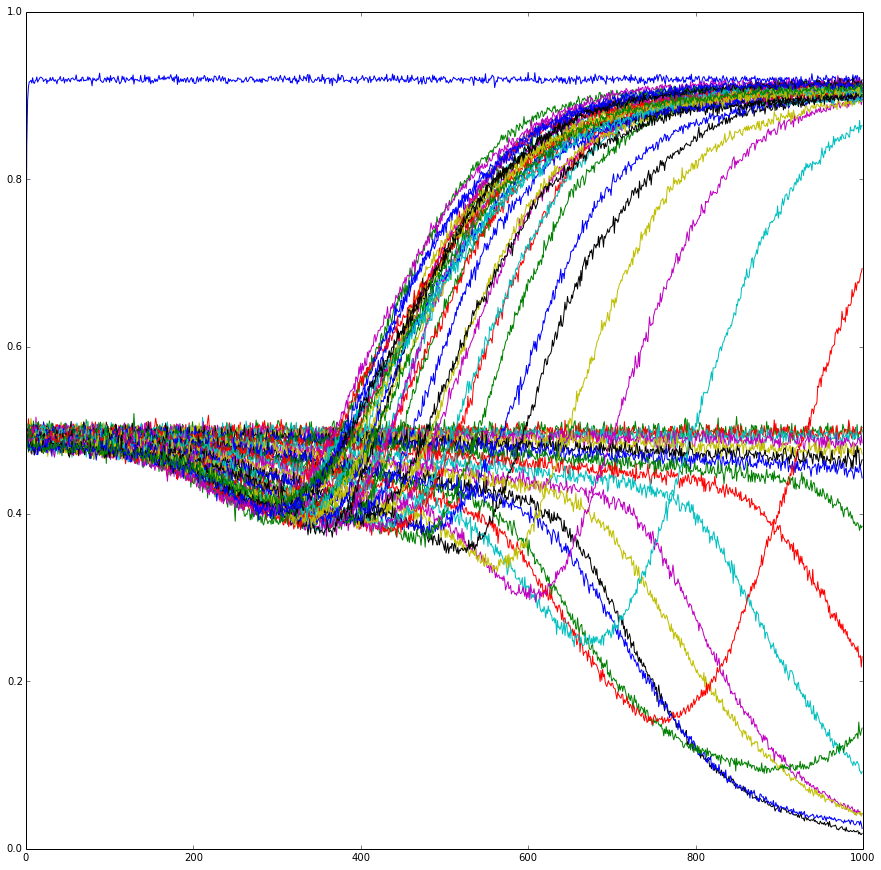

In [46]:
#PLOT TIME SERIES
#THE STATIONARY ONE (BLUE) IS Mutation_Scale = 0.0

obsnum = len(acc_rate_matrix.values()[0]) #hackish
#obsnum = 500 #ZOOMING IN ON THE INTERESTING PART

x = range(0, obsnum)
for mr_val in mr_seq:
    #y = acc_rate_matrix['%.1f' % mr_val]['AcceptanceRate'][0:obsnum]
    y = acc_rate_matrix['%.3f' % mr_val]['AcceptanceRate'][0:obsnum]

    plt.plot(x,y)
    #print("Min/Max AR values for MS %.1f are %.3f, %.3f" % (mr_val, min(y), max(y)) )
    print("Min/Max AR values for MS %.3f are %.3f, %.3f" % (mr_val, min(y), max(y)) )
plt.show()



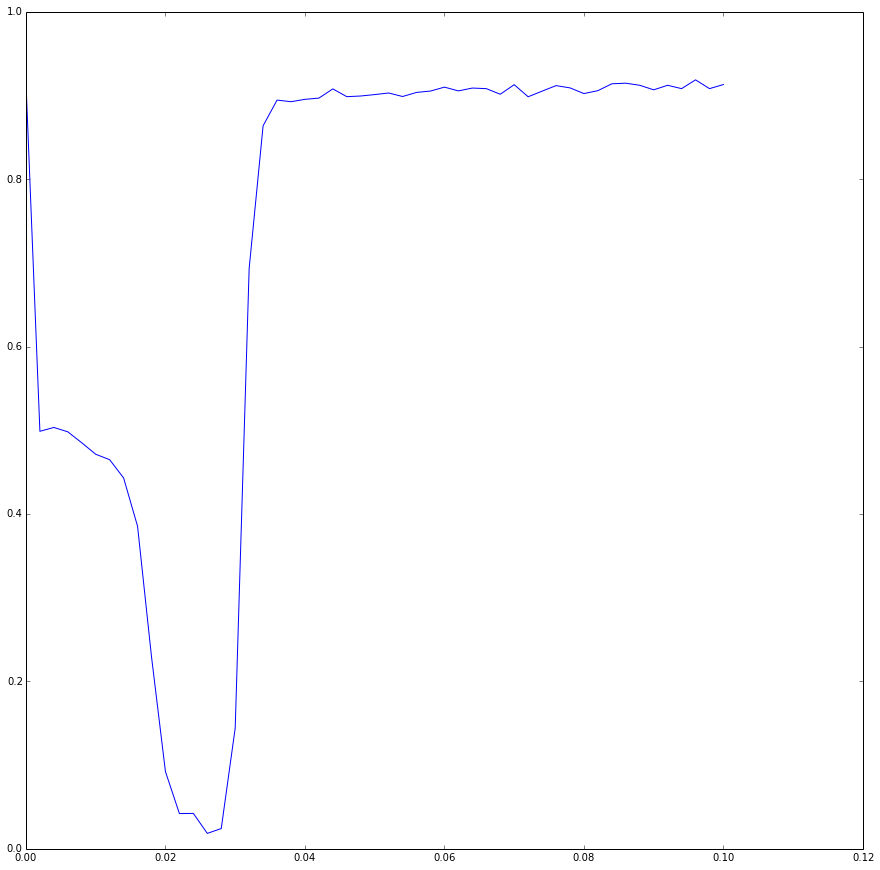

In [47]:
#PLOT Mutation / Acceptance (NOTE THE Y-SCALE: 0.90-1.00)

x_mr = []
y_ar = []

for mr_val in mr_seq:
    x_mr.append(mr_val) 
    #y_ar.append(acc_rate_matrix['%.1f' % mr_val]['AcceptanceRate'][obsnum-1])
    y_ar.append(acc_rate_matrix['%.3f' % mr_val]['AcceptanceRate'][obsnum-1])

plt.plot(x_mr,y_ar)
plt.show()
